# Imports

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
# might have to pip install -q transformers
from transformers import pipeline
from sklearn.linear_model import LinearRegression
import random
import re

# Import Data

In [2]:
data = pd.read_csv('Recipe Reviews and User Feedback Dataset.csv')
data.head()

,Unnamed: 0,recipe_number,recipe_code,recipe_name,comment_id,user_id,user_name,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score,text
0,0,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2G3aneMRgRMZwXqIHmSdXSG1hEM,u_9iFLIhMa8QaG,Jeri326,1,1665619889,0,0,0,5,527,"I tweaked it a little, removed onions because ..."
1,1,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FsPC83HtzCsQAtOxlbL6RcaPbY,u_Lu6p25tmE77j,Mark467,50,1665277687,0,7,0,5,724,Bush used to have a white chili bean and it ma...
2,2,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FPrSGyTv7PQkZq37j92r9mYGkP,u_s0LwgpZ8Jsqq,Barbara566,10,1664404557,0,3,0,5,710,I have a very complicated white chicken chili ...
3,3,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DzdSIgV9qNiuBaLoZ7JQaartoC,u_fqrybAdYjgjG,jeansch123,1,1661787808,2,2,0,0,581,"In your introduction, you mentioned cream chee..."
4,4,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DtZJuRQYeTFwXBoZRfRhBPEXjI,u_XXWKwVhKZD69,camper77,10,1664913823,1,7,0,0,820,Wonderful! I made this for a &#34;Chili/Stew&#...


# General Data Summary

In [3]:
total_thumbs = data.groupby('recipe_code').agg({'thumbs_up': 'sum', 'thumbs_down': 'sum', 'recipe_code': 'count'})
total_thumbs.columns = ['total_thumbs_up', 'total_thumbs_down', 'count']

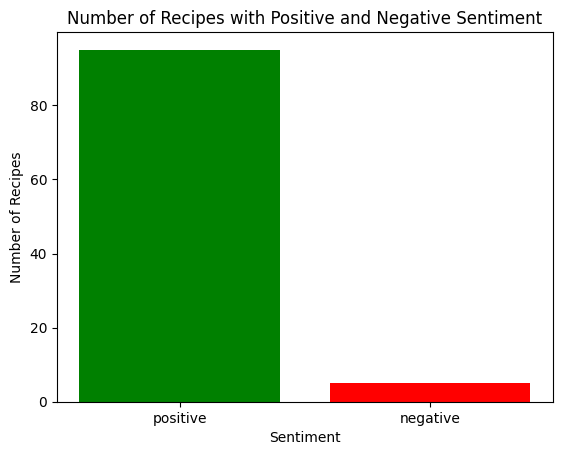

In [4]:
total_thumbs['sentiment'] = 'positive'
total_thumbs.loc[total_thumbs['total_thumbs_up'] < total_thumbs['total_thumbs_down'], 'sentiment'] = 'negative'

# Count the number of recipes with positive and negative sentiment
sentiment_counts = total_thumbs['sentiment'].value_counts()

# Plotting
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['green', 'red'])
plt.xlabel('Sentiment')
plt.ylabel('Number of Recipes')
plt.title('Number of Recipes with Positive and Negative Sentiment')
plt.show()


# Sentiment Analysis of Reviews

In [5]:
sentiment_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [6]:
x = sentiment_pipeline(data['text'][0])

In [7]:
x

[{'label': 'POSITIVE', 'score': 0.9997697472572327}]

In [8]:
x[0]['score']

0.9997697472572327

# Question 1
Do reviews with more positive scores recieve more thumbs up? Same with vice versa

In [9]:
sentiment_df = data
sentiment_df["sentiment_score"] = None

In [10]:
def remove_html_entity(input_string):
    input_string = str(input_string)
    result_string = input_string.replace("&#39;", "")
    result_string = result_string.replace("<h1>", "")
    result_string = result_string.replace("</h1>", "")
    result_string = result_string.replace("<span>", "")
    result_string = result_string.replace("</span>", "")
    result_string = result_string.replace("<li>", "")
    result_string = result_string.replace("</li>", "")
    result_string = result_string.replace("<i>", "")
    result_string = result_string.replace("</i>", "")
    result_string = result_string.replace("<h2>", "")
    result_string = result_string.replace("</h2>", "")
    result_string = result_string.replace("<ul>", "")
    result_string = result_string.replace("</ul>", "")
    result_string = result_string.replace("<b>", "")
    result_string = result_string.replace("</b>", "")
    result_string = result_string.replace("\xa0", "")
    

    return result_string

In [ ]:
# Change the object to a list
texts = []
for t in range(len(sentiment_df['text'])):
    text = sentiment_df['text'][t]
    text = remove_html_entity(text)
    if str(text) != "nan":
        texts.append(text)
        if len(text) > 2000:
            text_1 = text[0:1500]
            text_2 = text[1500:]
            sentiment_1 = sentiment_pipeline(text_1)[0]['score']
            sentiment_2 = sentiment_pipeline(text_2)[0]['score']
            sentiment_df["sentiment_score"][t] = (sentiment_1  + sentiment_2)/2
        else:
            sentiment_df["sentiment_score"][t] = sentiment_pipeline(text)[0]['score']
    else:
        sentiment_df["sentiment_score"][t] = 0

/var/folders/3k/0s83074d3_93z_bq3nvj2n0r0000gn/T/ipykernel_15819/2769961053.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentiment_df["sentiment_score"][t] = sentiment_pipeline(text)[0]['score']
/var/folders/3k/0s83074d3_93z_bq3nvj2n0r0000gn/T/ipykernel_15819/2769961053.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentiment_df["sentiment_score"][t] = 0
/var/folders/3k/0s83074d3_93z_bq3nvj2n0r0000gn/T/ipykernel_15819/2769961053.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

In [ ]:
sentiment_df.to_csv('sentiment_df.csv', index=False)

# Question 2 - Reviews Overtime
### How do the reviews change overtime if at all? 
- Use timestamps to make “timeline” of review sentiments overtime
- Use the running average of the ratings to look for deviations from average. 

## Step 1: One recipe
Get all review for one recipie and track sentiments & thumbs up over time

In [ ]:
random_idx = random.randint(1, len(data))
recipie_code = data['recipe_code'][random_idx]

In [ ]:
recipie_reviews = data[data['recipe_code'] == recipie_code]
# sort by time
recipie_reviews = recipie_reviews.sort_values(by='created_at')

In [ ]:
# Plotting the bar plot
plt.figure(figsize=(10, 6))  # Adjust size as needed
plt.bar(range(len(recipie_reviews)), recipie_reviews['thumbs_up'], align='edge')

# Adding labels and title
plt.xlabel('Index')
plt.ylabel('Thumbs Up')
plt.title('Thumbs Up Count for Sorted Result')
plt.xticks(range(len(recipie_reviews)), range(1, len(recipie_reviews) + 1))

# Show plot
plt.tight_layout()
plt.show()

In [ ]:
# Plotting the bar plot
plt.figure(figsize=(10, 6))  # Adjust size as needed
plt.bar(range(len(recipie_reviews)), recipie_reviews['best_score'], align='edge')

# Adding labels and title
plt.xlabel('Index')
plt.ylabel('Best Score')
plt.title('Best Score for Sorted Result')
plt.xticks(range(len(recipie_reviews)), range(1, len(recipie_reviews) + 1))

# Show plot
plt.tight_layout()
plt.show()

### Sentiment

In [ ]:
random_idx = random.randint(1, len(sentiment_df))
recipie_code = sentiment_df['recipe_code'][random_idx]
recipie_reviews = sentiment_df[sentiment_df['recipe_code'] == recipie_code]
recipie_reviews = recipie_reviews.sort_values(by='created_at')

In [ ]:
# Plotting the bar plot
plt.figure(figsize=(10, 6))  # Adjust size as needed
plt.bar(range(len(recipie_reviews)), recipie_reviews['sentiment_score'])

# Adding labels and title
plt.xlabel('Index')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Score for Sorted Result')
#plt.xticks(range(len(recipie_reviews)), range(1, len(recipie_reviews) + 1))

# Show plot
plt.tight_layout()
plt.show()

looks like sentiments DO NOT change overtime but "best score" does! There are definitley some deviations though which is pretty interesting!

# Question 3 - Length of Reviews vs. Intearctions
### Does the length of the review indicate anything about it's sentiment?
- Calculate average length of reviews for each recipe.
- Calculate average total interactions for reviews of each recipe. 
- Calculate average reply count for reviews of each recipe.
- Calculate average thumbs up for reviews of each recipe.
- Calculate average thumbs down for reviews of each recipe. 

## 1) Calculate average length, total interactions, replies, thumbs up & thumbs down of reviews for each recipe

In [41]:
avg_length = data.groupby('recipe_code').apply(lambda x: pd.Series({
                    'avg_length': x['text'].str.len().mean(),
                    'avg_created_at': x['created_at'].mean(),
                    'num_reviews': x.shape[0],
                    'avg_replies': x['reply_count'].mean(),
                    'avg_thumbs_up': x['thumbs_up'].mean(),
                    'avg_thumbs_down': x['thumbs_down'].mean(),
                    'avg_total_interactions': x['reply_count'].mean() + x['thumbs_up'].mean() + x['thumbs_down'].mean()
                    })).reset_index()
avg_length.head()

,recipe_code,avg_length,avg_created_at,num_reviews,avg_replies,avg_thumbs_up,avg_thumbs_down,avg_total_interactions
0,386,223.258929,1.624022e+09,224.0,0.013393,1.575893,0.450893,2.040179
1,414,205.502994,1.624243e+09,167.0,0.077844,1.233533,0.491018,1.802395
2,957,233.800948,1.623271e+09,211.0,0.018957,0.919431,0.383886,1.322275
3,1063,184.765823,1.622807e+09,158.0,0.006329,0.639241,0.563291,1.208861
4,1081,202.358108,1.623065e+09,148.0,0.000000,0.405405,0.168919,0.574324


## 2) Perform Linear Regression on the number of reviews, average replies, average thumbs up & thumbs down with average review length as the target.

In [22]:
X = avg_length[['num_reviews', 'avg_replies', 'avg_thumbs_up', 'avg_thumbs_down']]
y = avg_length['avg_length']

al_Model = LinearRegression().fit(X,y)

print("Coefficients:", al_Model.coef_)
print("Intercept:", al_Model.intercept_)

Coefficients: [ 2.19913019e-02  8.26748859e+01  8.21858724e+00 -1.01612182e+00]
Intercept: 188.94427270541212


## 3) Plot Average Length vs. Interaction Metrics

## Data Cleaning: Sort avg_length dataframe by increasing Average Length for consistency & visual analysis

In [42]:
sorted_avg_length = avg_length.sort_values(by='avg_length')

### a. Plot Average Length vs. Number of reviews

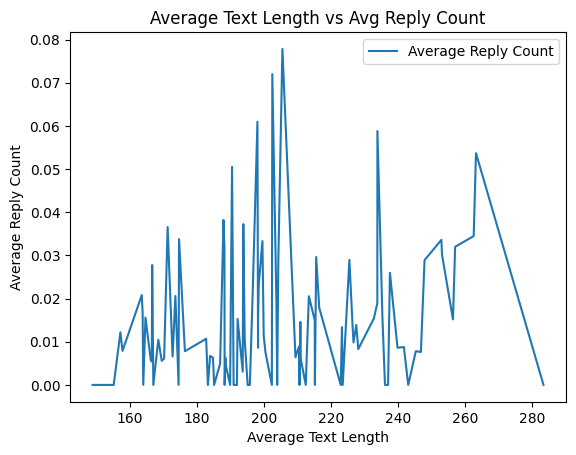

In [37]:
# Plot Interaction Variables
plt.plot(sorted_avg_length['avg_length'], sorted_avg_length['avg_replies'], label='Average Reply Count')

# Adding labels and title
plt.xlabel('Average Text Length')
plt.ylabel('Average Reply Count')
plt.title('Average Text Length vs Avg Reply Count')
plt.legend()

# Show plot
plt.show()

### b. Plot Average Length vs. Number of Reviews

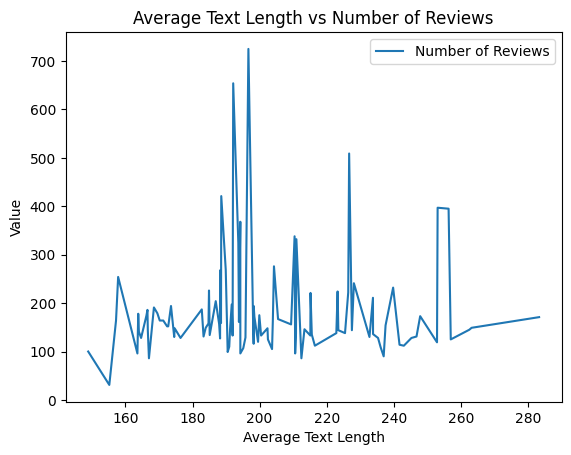

In [36]:
plt.plot(sorted_avg_length['avg_length'], sorted_avg_length['num_reviews'], label='Number of Reviews')

# Adding labels and title
plt.xlabel('Average Text Length')
plt.ylabel('Value')
plt.title('Average Text Length vs Number of Reviews')
plt.legend()

# Show plot
plt.show()

### c. Plot Average Length vs. Average Thumbs Up & Thumbs Down

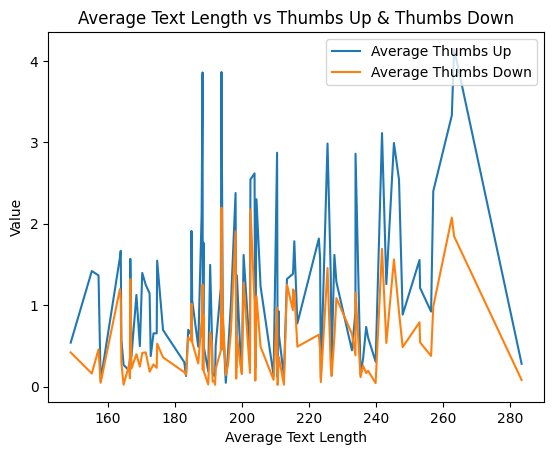

In [35]:
plt.plot(sorted_avg_length['avg_length'], sorted_avg_length['avg_thumbs_up'], label='Average Thumbs Up')
plt.plot(sorted_avg_length['avg_length'], sorted_avg_length['avg_thumbs_down'], label='Average Thumbs Down')

# Adding labels and title
plt.xlabel('Average Text Length')
plt.ylabel('Value')
plt.title('Average Text Length vs Thumbs Up & Thumbs Down')
plt.legend()

# Show plot
plt.show()

### d. Plot Average Length vs. Average Total Interactions

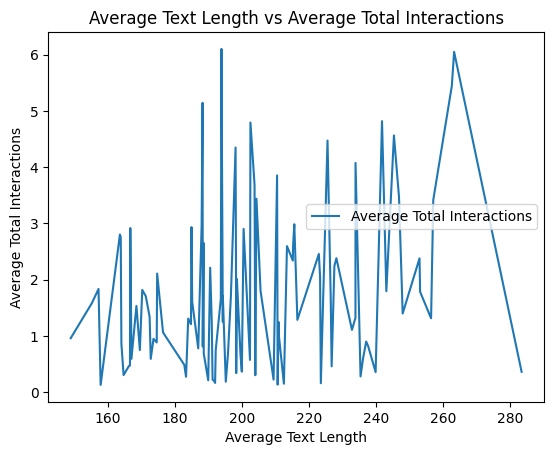

In [44]:
plt.plot(sorted_avg_length['avg_length'], sorted_avg_length['avg_total_interactions'], label='Average Total Interactions')

# Adding labels and title
plt.xlabel('Average Text Length')
plt.ylabel('Average Total Interactions')
plt.title('Average Text Length vs Average Total Interactions')
plt.legend()

# Show plot
plt.show()

### e. Plot Avg Total Interactions vs. Total Reply Count

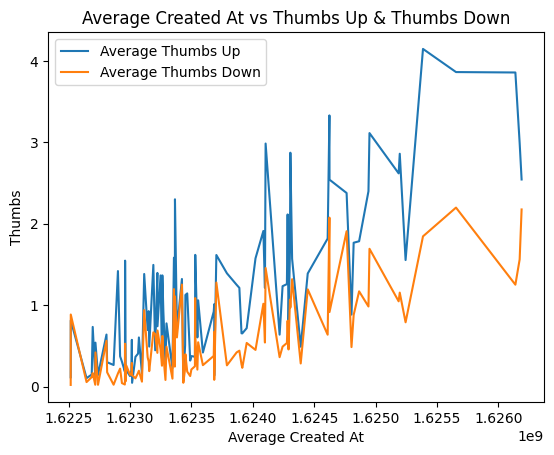

In [56]:
sorted_created_at = avg_length.sort_values(by='avg_created_at')
plt.plot(sorted_created_at['avg_created_at'], sorted_created_at['avg_thumbs_up'], label='Average Thumbs Up')
plt.plot(sorted_created_at['avg_created_at'], sorted_created_at['avg_thumbs_down'], label='Average Thumbs Down')

# Adding labels and title
plt.xlabel('Average Created At')
plt.ylabel('Thumbs')
plt.title('Average Created At vs Thumbs Up & Thumbs Down')
plt.legend()

# Show plot
plt.show()

## Correlation Matrix for Avg Variables

In [52]:
corr_matrix = avg_length.corr()
format_corr_matrix = corr_matrix.style.background_gradient(cmap='coolwarm', axis = None)
new_corr_matrix = format_corr_matrix.format(precision=2)
new_corr_matrix

,recipe_code,avg_length,avg_created_at,num_reviews,avg_replies,avg_thumbs_up,avg_thumbs_down,avg_total_interactions
recipe_code,1.00,0.07,0.06,-0.16,-0.15,0.06,0.03,0.05
avg_length,0.07,1.00,0.31,0.05,0.19,0.27,0.24,0.27
avg_created_at,0.06,0.31,1.00,0.01,0.51,0.78,0.73,0.79
num_reviews,-0.16,0.05,0.01,1.00,-0.02,-0.10,-0.12,-0.11
avg_replies,-0.15,0.19,0.51,-0.02,1.00,0.55,0.56,0.58
avg_thumbs_up,0.06,0.27,0.78,-0.10,0.55,1.00,0.87,0.98
avg_thumbs_down,0.03,0.24,0.73,-0.12,0.56,0.87,1.00,0.95
avg_total_interactions,0.05,0.27,0.79,-0.11,0.58,0.98,0.95,1.00


# Question 4 - User Reputation vs. Sentiment
### Does the user reputation indicate anything about it's sentiment?
- Calculate average user reputation of reviews for each recipe.
- Calculate average sentiment for reviews of each recipe. 
- Calculate sentiment of recipe title?